In [2]:
import pickle
samples = pickle.load(open('MagAOX_companionposition_MCMC_chains_5000steps.pkl','rb'))
xcc = np.array([np.mean(samples[1000:,:,0]),np.std(samples[1000:,:,0])])
xcc_array = samples[1000:,:,0]
ycc = np.array([np.mean(samples[1000:,:,1]),np.std(samples[1000:,:,1])])
ycc_array = samples[1000:,:,1]

samples = pickle.load(open('MagAOX_HIP67506Aposition_MCMC_chains.pkl','rb'))
xca = np.array([np.mean(samples[1000:,:,0]),np.std(samples[1000:,:,0])])
xca_array = samples[1000:,:,0]
yca = np.array([np.mean(samples[1000:,:,1]),np.std(samples[1000:,:,1])])
yca_array = samples[1000:,:,1]

samples = pickle.load(open('2015-astrometry.pkl','rb'))
xcc_2015 = np.array([np.mean(samples[0]),np.std(samples[0])])
xcc_2015_array = samples[0]
ycc_2015 = np.array([np.mean(samples[1]),np.std(samples[1])])
ycc_2015_array = samples[1]

xca_2015, yca_2015 = 89.5, 89.5

xcc, ycc, xca, yca, xcc_2015, ycc_2015, xca_2015, yca_2015

(array([2.45288493e+02, 2.77135065e-03]),
 array([2.41727493e+02, 2.08852972e-03]),
 array([2.55503470e+02, 3.17631799e-04]),
 array([2.55505871e+02, 2.85591225e-04]),
 array([75.84815579,  5.21837703]),
 array([90.90675992,  6.09757153]),
 89.5,
 89.5)

In [3]:
pixscale = 15.9 #mas/pixel
dx,dy = (xcc_2015_array-xca_2015),(ycc_2015_array-yca_2015)
delta_obs_RA_2015 = np.mean(dx*pixscale) #mas
delta_obs_RA_2015_err = np.std(dx*pixscale)

delta_obs_Dec_2015 = np.mean(dy*pixscale) #mas
delta_obs_Dec_2015_err = np.std(dy*pixscale)

pixscale = 5.9 #mas/pixel
dx,dy = (xcc_array-xca_array),(ycc_array-yca_array)
delta_obs_RA_2022 = np.mean(dx*pixscale) #mas
delta_obs_RA_2022_err = np.std(dx*pixscale)

delta_obs_Dec_2022 = np.mean(dy*pixscale) #mas
delta_obs_Dec_2022_err = np.std(dy*pixscale)

delta_obs_RA = np.array([delta_obs_RA_2015,delta_obs_RA_2022])
delta_obs_RA_err = np.array([delta_obs_RA_2015_err,delta_obs_RA_2022_err])
delta_obs_Dec = np.array([delta_obs_Dec_2015,delta_obs_Dec_2022])
delta_obs_Dec_err = np.array([delta_obs_Dec_2015_err,delta_obs_Dec_2022_err])

delta_obs_RA,delta_obs_RA_err,delta_obs_Dec,delta_obs_Dec_err

(array([-217.06432296,  -60.26836743]),
 array([8.29721948e+01, 1.64668786e-02]),
 array([ 22.3674827 , -81.29243112]),
 array([9.69513874e+01, 1.24372314e-02]))

In [4]:
from myastrotools.tools import physical_separation, MonteCarloIt

dx,dy = (xca_2015-xcc_2015_array),(yca_2015-ycc_2015_array)
r = np.sqrt(dx**2+dy**2) #pixels
pixscale = 15.9 #mas/pixel
seppix = pixscale*r
sep_2015 = seppix
#sep_2015 = sep_2015*u.mas.to(u.arcsec)
pa_2015 = np.degrees(np.arctan2(dx,-dy))


dx,dy = (xca_array-xcc_array),(yca_array-ycc_array)
r = np.sqrt(dx**2+dy**2) #pixels
pixscale = 5.9 #mas/pixel
seppix = pixscale*r
sep_2022 = seppix
sep_2022 = sep_2022*u.mas.to(u.arcsec)
pa_2022 = np.degrees(np.arctan2(dx,-dy))

sep = np.array([ np.mean(sep_2015), np.mean(sep_2022) ])
sep_err = np.array([ np.std(sep_2015), np.std(sep_2022) ])
pa_deg = np.array([ np.mean(pa_2015), np.mean(pa_2022) ])
pa_err = np.array([ np.std(pa_2015), np.std(pa_2022) ])
sep, sep_err, pa_deg, pa_err


out = {'delta RA':-delta_obs_RA,
       'delta RA err':delta_obs_RA_err,
       'delta Dec':delta_obs_Dec,
       'delta Dec err':delta_obs_Dec_err,
       'sep': sep,
       'sep err': sep_err,
       'pa':pa_deg,
       'pa err': pa_err
      }

pickle.dump(out,open('AC_astrometry_dict.pkl','wb'))
out

{'delta RA': array([217.06432296,  60.26836743]),
 'delta RA err': array([8.29721948e+01, 1.64668786e-02]),
 'delta Dec': array([ 22.3674827 , -81.29243112]),
 'delta Dec err': array([9.69513874e+01, 1.24372314e-02]),
 'sep': array([2.39878444e+02, 1.01196520e-01]),
 'sep err': array([7.97465564e+01, 1.36548931e-05]),
 'pa': array([ 83.74193624, 143.4475999 ]),
 'pa err': array([2.79020419e+01, 8.76005617e-03])}

In [5]:
from astropy.time import Time
times = '2015-05-13T00:00:00'
to = Time(times, format='isot', scale='utc')
times = '2022-04-20T00:00:00'
t = Time(times, format='isot', scale='utc')
t = t.decimalyear
to = to.decimalyear
obsdate = np.array([to,t])
obsdate

array([2015.36164384, 2022.29863014])

In [6]:
# van Leeuwen 2007 Hip2 reduction:
hipplx = np.array([11.17,3.27])
hip_pmra = -34.55 # mas/yr
hip_pmdec = -19.45
hip_mag = 10.7386
hip_BminusV = 0.743
hip_ra = 207.49640321
hip_dec = -43.05036556

from astroquery.gaia import Gaia
sourceid = 6109011780753115776
cat = "gaiadr3.gaia_source"
string = "SELECT * FROM "+cat+" WHERE source_id = "+str(sourceid)
job = Gaia.launch_job(string)
r = job.get_results()
print(r['parallax'][0])
gaiaplx = r['parallax'][0]

from myastrotools.tools import MonteCarloIt
dist = np.array([89.5,30])

RA = hip_ra
Dec = hip_dec

bkgd_star_vel_vector = np.sqrt(hip_pmra**2+hip_pmdec**2)

Created TAP+ (v1.2.1) - Connection:
	Host: gea.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
Created TAP+ (v1.2.1) - Connection:
	Host: geadata.esac.esa.int
	Use HTTPS: True
	Port: 443
	SSL Port: 443
4.512717092654476


/Users/loganpearce/anaconda3/lib/python3.7/site-packages/erfa/core.py:155: ErfaWarning: ERFA function "taiutc" yielded 18 of "dubious year (Note 4)"
  ErfaWarning)


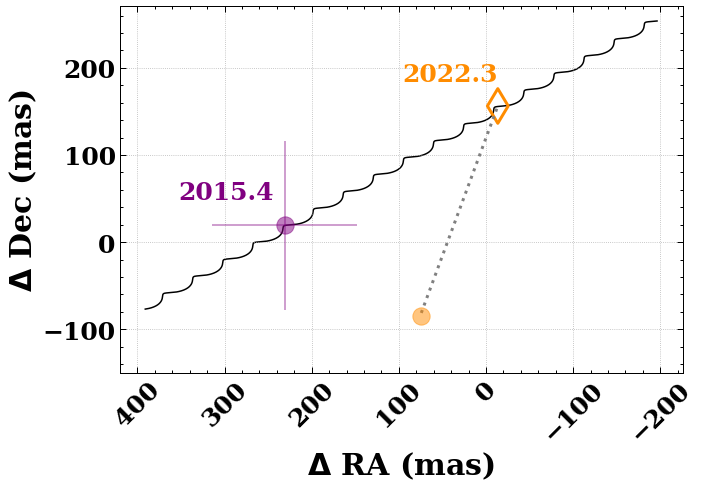

In [7]:
from astropy.time import Time
from astropy.coordinates import SkyCoord, GeocentricTrueEcliptic
from myastrotools.tools import ecliptic_to_equatorial
from cycler import cycler

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

# Ref epoch:
ref_index = 0
ref_date = Time(obsdate[ref_index],format='decimalyear',scale='utc')


ref_RA_offset = delta_obs_RA[ref_index]
ref_Dec_offset = delta_obs_Dec[ref_index]

time_interval=[5,12]

marker_size = [600,300]
label_offset = [100,-15]
labelsize = 25
#plt_style = 'magrathea',
plt_style = 'magrathea_bold'

# Color cycler:
n = 8
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.jet(np.linspace(0,1,n)))
colors = ['purple','darkorange']
labels=np.round(obsdate,decimals=1)

n_times = 800
xlabel = r'$\Delta$ RA (mas)'
ylabel = r'$\Delta$ Dec (mas)'
marker = ["d",'o']
fontsize = 20
tick_labelsize = 25
alpha=0.5
figsize = (10,8)
write_to_file = False
output_name = 'cpm.pdf'
form = 'pdf'
plt_xlim=None
plt_ylim=None


parallax, parallax_error = [gaiaplx,r['parallax_error'][0]]
pmRA = -hip_pmra
pmDec = -hip_pmdec



plt.style.use(plt_style)
deg_to_mas = 3600000.
mas_to_deg = 1./3600000.
############### Compute track: ###################
# Define a time span around reference date:
delta_time = np.linspace(-time_interval[0], time_interval[1], n_times)*u.yr
times = ref_date + delta_time

# Compute change in RA/Dec during time interval due to proper motion only:
dRA, dDec = (pmRA)*(delta_time.value), (pmDec)*(delta_time.value)

# Compute motion in the ecliptic coords due to parallactic motion:
# Make a sky coord object in RA/Dec:
obj = SkyCoord(ra = RA, dec = Dec, frame='icrs', unit='deg'#, obstime = 'J2015.5'
              ) 
# Convert to ecliptic lon/lat:
gteframe = GeocentricTrueEcliptic()
obj_ecl = obj.transform_to(gteframe)

# Angle array during a year:
theta = (delta_time.value%1)*2*np.pi
#Parallel to ecliptic:
x = parallax*np.sin(theta)  
#Perp to ecliptic
y = parallax*np.sin(obj_ecl.lat.rad)*np.cos(theta)

# Compute ecliptic motion to equatorial motion:
new_RA, new_Dec = ecliptic_to_equatorial(obj_ecl.lon.deg+x*mas_to_deg, \
                                       obj_ecl.lat.deg+y*mas_to_deg)
from astropy.coordinates import SkyCoord
maxecl_lon = np.max(obj_ecl.lon.deg+x*mas_to_deg)
maxecl_lat = np.max(obj_ecl.lat.deg+y*mas_to_deg)
obj2 = SkyCoord(lon = maxecl_lon,\
                    lat = maxecl_lat, \
                    frame='geocentrictrueecliptic', unit='deg')
obj2 = obj2.transform_to('icrs')


# Compute change in RA/Dec for each time point in mas:
delta_RA, delta_Dec = (new_RA-RA)*deg_to_mas,(new_Dec-Dec)*deg_to_mas

#Put it together:
dRA_total = delta_RA + dRA + ref_RA_offset
dDec_total = delta_Dec + dDec + ref_Dec_offset

############# Compute prediction: #############
### Where the object would have been observed were it a background object

# Compute how far into each year the observation occured:
pred_time_delta = (obsdate - np.floor(obsdate))
pred_theta = (pred_time_delta)*2*np.pi

# Compute ecliptic motion:
pred_x = parallax*np.sin(pred_theta)  #Parallel to ecliptic
pred_y = parallax*np.sin(obj_ecl.lat.rad)*np.cos(pred_theta)  #Perp to ecliptic

# Convert to RA/Dec:
pred_new_RA, pred_new_Dec = ecliptic_to_equatorial(obj_ecl.lon.deg+pred_x*mas_to_deg, \
                                       obj_ecl.lat.deg+pred_y*mas_to_deg)
pred_delta_RA, pred_delta_Dec = (pred_new_RA-RA)*deg_to_mas,(pred_new_Dec-Dec)*deg_to_mas

# Compute location due to proper motion:
pred_dRA, pred_dDec = (pmRA)*(obsdate-ref_date.value), (pmDec)*(obsdate-ref_date.value)

# Put it together:
pred_dRA_total = -pred_delta_RA + pred_dRA + ref_RA_offset
pred_dDec_total = -pred_delta_Dec + pred_dDec + ref_Dec_offset


#################### Draw plot: #################
plt.rcParams['ytick.labelsize'] = tick_labelsize
plt.rcParams['xtick.labelsize'] = tick_labelsize
custom_cycler = (cycler(color=colors))
fig = plt.figure(figsize = figsize)

plt.plot(-dRA_total,dDec_total, zorder = 1, color='black', lw=1.5, label=r'EDR3 $\mu$+$\pi$, A')
#plt.arrow(267,221,65*2,50*2, head_width = 10, lw=1.5)
plt.gca().set_prop_cycle(custom_cycler)

triangleoffsets_ra = [10,4,0,0,0,0,0]
triangleoffsets_dec = [-2,-2,0,0,0,0,0]

labeloffsets_ra = [-10,0,-20,-30,-20,120,120]
labeloffsets_dec = [20,20,-40,-20,-15,-15,10]

for i in range(len(pred_dRA)):
    if i == 1:
        plt.scatter(-pred_dRA_total[i]+triangleoffsets_ra[i], pred_dDec_total[i]+triangleoffsets_dec[i], 
                    marker = marker[0], s=marker_size[0], zorder=2, linewidths=3, facecolors='None',
                   edgecolors=colors[i])
    plt.annotate(
        labels[i],
        xy=(-pred_dRA_total[i]+triangleoffsets_ra[i], pred_dDec_total[i]+triangleoffsets_dec[i]), 
            xytext=(labeloffsets_ra[i], labeloffsets_dec[i]),
        textcoords='offset points', ha='right', va='bottom', fontsize=25, color=colors[i]
    )
for i in range(len(delta_obs_RA)):
    plt.scatter(-delta_obs_RA[i]+14,delta_obs_Dec[i]-3, marker = marker[1], s=marker_size[1], \
                    alpha=alpha, zorder = 10)
    plt.errorbar(-delta_obs_RA[i]+14,delta_obs_Dec[i]-3, xerr =  delta_obs_RA_err[i], yerr = delta_obs_Dec_err[i],
                    alpha=alpha, zorder = 10, ls='None')
    
i = 1
plt.plot([-delta_obs_RA[i]+14, -pred_dRA_total[i]+triangleoffsets_ra[i]],
         [delta_obs_Dec[i], pred_dDec_total[i]+triangleoffsets_dec[i]], color='gray', ls=':', lw=3
        )
    


if plt_xlim != None:
    plt.xlim(plt_xlim[0],plt_xlim[1])
if plt_ylim != None:
    plt.ylim(plt_ylim[0],plt_ylim[1])
plt.ylim(bottom = -150)
plt.xlabel(xlabel, fontsize = 30)
plt.xticks(rotation=45)
plt.ylabel(ylabel, fontsize = 30)
plt.gca().invert_xaxis()
plt.gca().set_aspect('equal')
plt.grid(ls=':')
    

plt.tight_layout()

#plt.savefig('AC_common_proper_motion_plot.png')
plt.show()
